**Importing Libraries**

In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
import plotly.io as pio
pio.renderers.default='colab'

**Fetching Historial Stock Data of Tesla**

In [3]:
# Importing Yahoo Finance
import yfinance as yf

# Downloading TSLA data based on current date
from datetime import datetime
from dateutil.relativedelta import relativedelta

end_date=datetime.today()  # Current date
start_date=end_date-relativedelta(years=1)  # Date 1 year ago from the current date

df = yf.download("TSLA", start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), auto_adjust=False, group_by='ticker', progress=False)

# Flattening column headers (e.g., ('Close', 'TSLA') → 'Close')
df.columns = [col[1] for col in df.columns]

# Reseting index so 'Date' becomes a column
df = df.reset_index()

**Loading & Exploring Data**

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-08-22,223.820007,224.800003,210.320007,210.660004,210.660004,79514500
1,2024-08-23,214.460007,221.479996,214.210007,220.320007,220.320007,81525200
2,2024-08-26,218.750000,219.089996,211.009995,213.210007,213.210007,59301200
3,2024-08-27,213.250000,215.660004,206.940002,209.210007,209.210007,62821400
4,2024-08-28,209.720001,211.839996,202.589996,205.750000,205.750000,64116400
...,...,...,...,...,...,...,...
245,2025-08-15,337.660004,339.299988,327.019989,330.559998,330.559998,74319800
246,2025-08-18,329.619995,336.269989,329.589996,335.160004,335.160004,56956600
247,2025-08-19,335.790009,340.549988,327.850006,329.309998,329.309998,75956000
248,2025-08-20,329.220001,331.369995,314.600006,323.899994,323.899994,77481800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


In [6]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,250,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2025-02-20 13:09:07.200000,309.276040,316.472320,301.456161,309.060920,309.060920,9.868684e+07
min,2024-08-22 00:00:00,208.630005,211.839996,202.589996,205.750000,205.750000,3.716760e+07
25%,2024-11-19 06:00:00,252.539993,259.592506,245.999996,252.827496,252.827496,7.412390e+07
50%,2025-02-22 12:00:00,313.384995,322.304993,307.470001,315.500000,315.500000,8.903360e+07
75%,2025-05-21 18:00:00,345.624992,354.987495,337.525009,344.937500,344.937500,1.156606e+08
max,2025-08-21 00:00:00,475.899994,488.540009,457.510010,479.859985,479.859985,2.874998e+08
std,NaN,63.711303,64.874676,61.850132,63.268941,63.268941,3.752871e+07


**Visualizing Closing Price Over Time**

In [7]:
# Area Chart of Closing Price Over Time
px.area(df,x="Date",y="Close",title="TSLA Closing Price Over Time (Area Chart)")

In [8]:
# Line Chart of Closing Price Over Time
px.line(df,x="Date",y="Close",title="TSLA Closing Price Over Time (Line Chart)")

**Visualizing Volume**

In [9]:
# Area Chart of Volume Over Time
px.area(df,x="Date",y="Volume",title="TSLA Trading Volume Over Time (Area Chart)")

In [10]:
# Bar Chart of Volume
px.bar(df,y='Volume',title="TSLA Trading Volume Distribution (Bar Chart)")

**Boxplot of Close Prices**

In [11]:
px.box(df,y='Close',title="TSLA Closing Price Distribution (Boxplot)")

**Creating New Data Frame (ndf) with only Relevant Columns**

In [12]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)

In [13]:
ndf

,Date,Close
0,2024-08-22,210.660004
1,2024-08-23,220.320007
2,2024-08-26,213.210007
3,2024-08-27,209.210007
4,2024-08-28,205.750000
...,...,...
245,2025-08-15,330.559998
246,2025-08-18,335.160004
247,2025-08-19,329.309998
248,2025-08-20,323.899994


**Preparing Data for Prophet**

In [14]:
# Renaming columns to ['ds', 'y'] for Prophet (prophet_df)
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [15]:
prophet_df

,ds,y
0,2024-08-22,210.660004
1,2024-08-23,220.320007
2,2024-08-26,213.210007
3,2024-08-27,209.210007
4,2024-08-28,205.750000
...,...,...
245,2025-08-15,330.559998
246,2025-08-18,335.160004
247,2025-08-19,329.309998
248,2025-08-20,323.899994


**Fitting the Prophet Model**

In [16]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_vw8lh5/8k_ykbnj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_vw8lh5/jam67uzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29206', 'data', 'file=/tmp/tmpn_vw8lh5/8k_ykbnj.json', 'init=/tmp/tmpn_vw8lh5/jam67uzg.json', 'output', 'file=/tmp/tmpn_vw8lh5/prophet_modellqsytg1r/prophet_model-20250822145238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Creating Future Dataframe & Generating Forecast**

In [17]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-08-22,187.905493,142.910985,219.724043,187.905493,187.905493,-5.113681,-5.113681,-5.113681,-5.113681,-5.113681,-5.113681,0.0,0.0,0.0,182.791812
1,2024-08-23,189.507908,150.217042,226.836824,189.507908,189.507908,-1.826244,-1.826244,-1.826244,-1.826244,-1.826244,-1.826244,0.0,0.0,0.0,187.681665
2,2024-08-26,194.315156,151.458376,227.913177,194.315156,194.315156,-6.212132,-6.212132,-6.212132,-6.212132,-6.212132,-6.212132,0.0,0.0,0.0,188.103024
3,2024-08-27,195.917572,154.254703,227.543168,195.917572,195.917572,-4.441943,-4.441943,-4.441943,-4.441943,-4.441943,-4.441943,0.0,0.0,0.0,191.475629
4,2024-08-28,197.519988,154.785919,230.814182,197.519988,197.519988,-4.406030,-4.406030,-4.406030,-4.406030,-4.406030,-4.406030,0.0,0.0,0.0,193.113958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2025-09-16,354.514224,310.938718,390.108536,347.649238,361.129596,-4.441943,-4.441943,-4.441943,-4.441943,-4.441943,-4.441943,0.0,0.0,0.0,350.072281
276,2025-09-17,354.964800,312.575106,389.966240,347.660650,362.158231,-4.406030,-4.406030,-4.406030,-4.406030,-4.406030,-4.406030,0.0,0.0,0.0,350.558770
277,2025-09-18,355.415376,309.689194,387.073691,347.628545,363.082847,-5.113681,-5.113681,-5.113681,-5.113681,-5.113681,-5.113681,0.0,0.0,0.0,350.301695
278,2025-09-19,355.865952,311.805050,391.331781,347.471968,364.096675,-1.826244,-1.826244,-1.826244,-1.826244,-1.826244,-1.826244,0.0,0.0,0.0,354.039709


**Visualizing Forecast**

In [19]:
# Plotly Line Chart for Prophet Forecast
px.line(forecast,x='ds',y='yhat',title="TSLA Forecasted Closing Price (Prophet Prediction)")

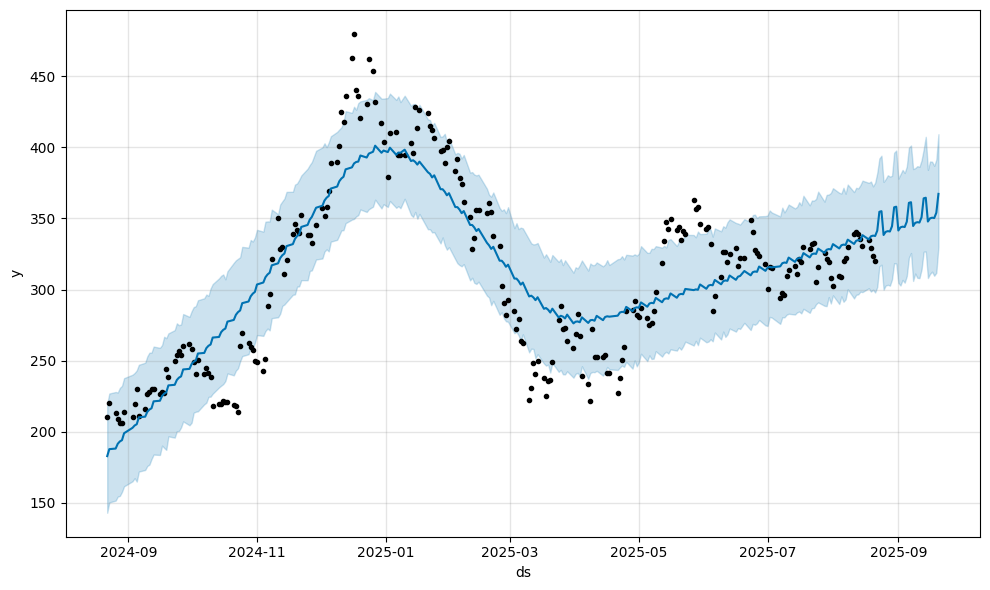

In [20]:
# Prophet Forecast Plot
figure=m.plot(forecast,xlabel='ds',ylabel='y')

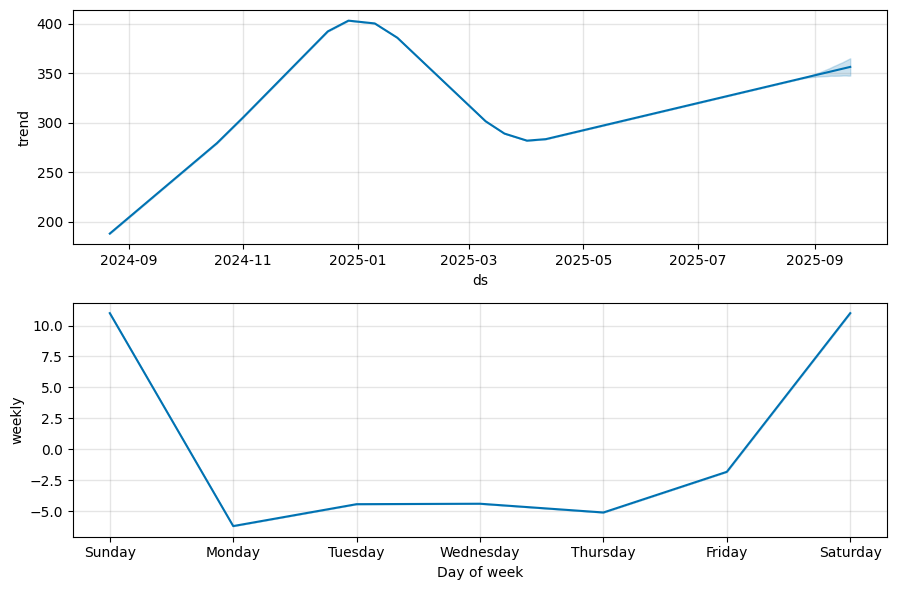

In [21]:
# Prophet Forecast Components Plot (Trend & Seasonality)
figure2=m.plot_components(forecast)

**Visualizizng Actual vs Forecast**

In [22]:
# Comparing Actual vs Forecast
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=prophet_df['ds'], y=prophet_df['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))
fig.update_layout(title='TSLA Forecast vs Actual', xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

**Visualizing the Predicted 30 Days of Forecast**

In [23]:
# Filtering the forecast DataFrame to get the last 30 days
forecast_last_30_days = forecast.tail(30)

# Plotting the last 30 days of the forecast
px.line(forecast_last_30_days, x='ds', y='yhat', title="TSLA Forecasted Closing Price for the Next 30 Days")

**Downloading Forecast Data as a CSV File**

In [24]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>